In [10]:
# Using python to find variables that impact revenue of films using correlation

In [4]:
# 1. Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust configuration of plots created

In [5]:
# next read in data
df = pd.read_csv(r"/Users/oreoluwaalbert/Downloads/Projects/Portfolio Roadmap 4:4/movies.csv")

In [6]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


# 1. Clean the data

In [43]:
# Check for missing data

for col in df.columns:
     pct_missing = np.mean(df[col].isnull())
     print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [45]:
# Figure out data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
df['budget'] = df['budget'].astype('Int64')

In [12]:
df['budget'].isna().sum()


2171

In [14]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0


In [16]:
# lets convert all NaN in the budget column to O (was giving us errors when trying to change to int64)

df['budget'] = df['budget'].fillna(0).astype('Int64')

In [18]:
# 2. discrepancy in year released and release date

df['year_cleaned'] = df['released'].astype(str).str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cleaned
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,2020


In [20]:
# it turns out that my released column isnt in shortdate and has the released country, so we have to split

df[['released_date', 'release_country']] = df['released'].str.split('(', n=1, expand=True)

In [22]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cleaned,released_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980,"July 25, 1980",United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,2020,"October 23, 2020",United States)
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,2020,"February 7, 2020",United States)
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,"April 27, 2020",Cameroon)
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,2020,"October 1, 2020",United States)


In [24]:
df['release_country'] = df['release_country'].str.replace(")", "", regex = False).str.strip()

In [26]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cleaned,released_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980,"July 25, 1980",United States


In [28]:
# now time to convert separated date to short format and then drop initial date column

df['released_date'] = pd.to_datetime(df['released_date'], errors = 'coerce')

In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cleaned,released_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980,1980-07-25,United States


In [32]:
df = df.rename(columns = {
    'year_cleaned': 'release_year',
    'released_date': 'release_date'
}
    
)

In [34]:
df.head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,1980-06-13,United States


In [36]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980,1980-07-25,United States
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601.0,Paramount Pictures,95.0,1980,1980-05-09,United States
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890.0,Universal Pictures,133.0,1980,1980-06-20,United States
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427.0,Chartoff-Winkler Productions,129.0,1980,1980-12-19,United States
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706.0,Dovemead Films,127.0,1981,1981-06-19,United States
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189.0,United Artists,100.0,1980,1980-05-16,United States


In [181]:
# now we are going to order it by gross earnings

df.sort_values(by = ['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,2018-04-27,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120,2020,2020-10-01,United States


In [42]:
# didnt like how the figures were being displayed so this code changes that

pd.set_option('display.float_format', '{:.0f}'.format)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120,2020,2020-10-01,United States


In [107]:
# look for and search for duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [109]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120,2020,2020-10-01,United States


### Correlation

In [118]:
# Now that we have cleaned data, what variables are most correlated to gross revenue
# Budget
# Name of studio

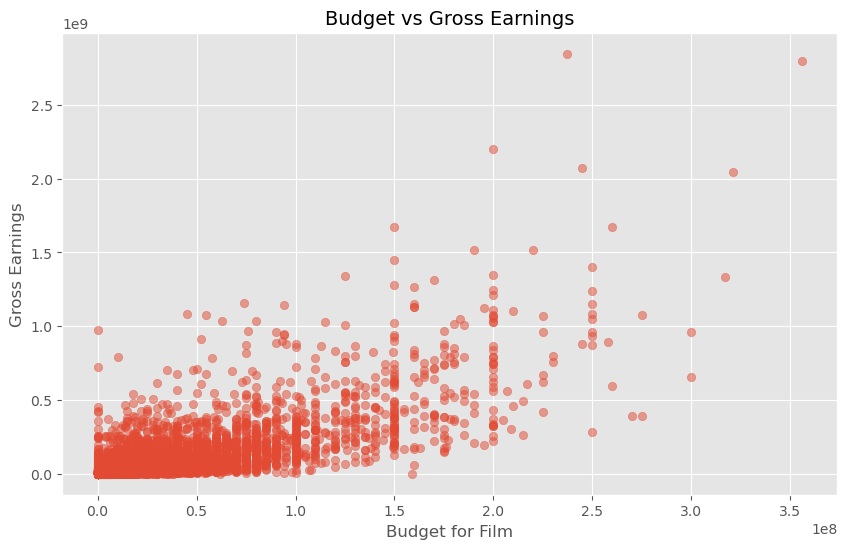

In [126]:
# 1. scatter plot with budget vs gross rev

plt.figure(figsize=(10,6))
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)

plt.title('Budget vs Gross Earnings', fontsize=14)
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()


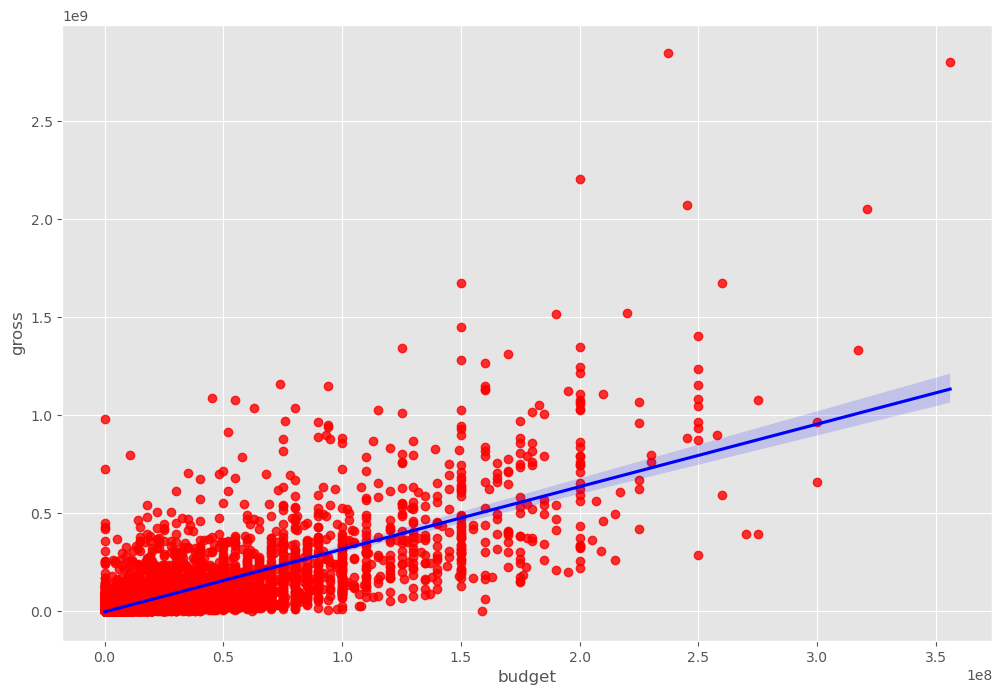

In [132]:
# plot Budget vs Gross Earnings
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [163]:
# now we can see there is a positive correlation but we need an actual figure
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()


,year,score,votes,budget,gross,runtime
year,1,0,0,0,0,0
score,0,1,0,0,0,0
votes,0,0,1,0,1,0
budget,0,0,0,1,1,0
gross,0,0,1,1,1,0
runtime,0,0,0,0,0,1


In [140]:
df.select_dtypes(include=['number']).head()


,year,score,votes,budget,gross,runtime
5445,2009,8,1100000,237000000,2847246203,162
7445,2019,8,903000,356000000,2797501328,181
3045,1997,8,1100000,200000000,2201647264,194
6663,2015,8,876000,245000000,2069521700,138
7244,2018,8,897000,321000000,2048359754,149


In [148]:
df.corr(numeric_only=True, method='pearson')


,year,score,votes,budget,gross,runtime
year,1,0,0,0,0,0
score,0,1,0,0,0,0
votes,0,0,1,0,1,0
budget,0,0,0,1,1,0
gross,0,0,1,1,1,0
runtime,0,0,0,0,0,1


In [144]:
df[['budget','gross']].head()
df[['budget','gross']].dtypes


budget      Int64
gross     float64
dtype: object

In [146]:
# Convert budget to float
df['budget'] = df['budget'].astype(float)

# Convert gross to float too (just to be safe)
df['gross'] = df['gross'].astype(float)

# Now correlation will work
print(df[['budget', 'gross']].corr())


        budget  gross
budget       1      1
gross        1      1


In [150]:
print((df['budget'] == df['gross']).all())


False


In [152]:
print(df.dtypes[['budget', 'gross']])


budget    float64
gross     float64
dtype: object


In [154]:
print(df[['budget', 'gross']].corr(method='pearson'))

        budget  gross
budget       1      1
gross        1      1


In [159]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').astype(float)
df['gross']  = pd.to_numeric(df['gross'], errors='coerce').astype(float)


In [161]:
print(df[['budget', 'gross']].corr())


        budget  gross
budget       1      1
gross        1      1


In [193]:
print(df[['budget','gross']].head(20))
print(df[['budget','gross']].corr())


     budget     gross
0  19000000  46998772
1   4500000  58853106
2  18000000 538375067
3   3500000  83453539
4   6000000  39846344
5    550000  39754601
6  27000000 115229890
7  18000000  23402427
8  54000000 108185706
9  10000000  15795189
10 15000000  70687344
11  5000000  30031783
12 20000000  49823037
13  6000000  54766923
14  6500000  31899000
15  5100000   9709597
16        0  21202829
17 10000000 103300686
18  1000000  21448782
19        0 101300000
        budget  gross
budget       1      1
gross        1      1


In [167]:
df_unsorted = df.copy()  # make a copy
df_corr = df_unsorted[['budget','gross']].corr(method='pearson')
print(df_corr)


        budget  gross
budget       1      1
gross        1      1


In [169]:
df[['budget','year']].corr(method='pearson')


,budget,year
budget,1,0
year,0,1


In [187]:
df = df.sort_index()


In [189]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120,2020,2020-10-01,United States


In [191]:
df[['budget','year']].corr(method='pearson')

,budget,year
budget,1,0
year,0,1


In [195]:
corr_val = df['budget'].corr(df['gross'], method='pearson')
print(corr_val)


0.7487193630687449


In [200]:

corr_val = df['runtime'].corr(df['gross'], method='pearson')
print(corr_val)

0.24521613203808643


In [202]:
corr_val = df[['budget','gross']].corr(method='pearson').loc['budget','gross']
print(corr_val)


0.7487193630687451


In [204]:
corr_matrix = df[['budget','gross']].corr(method='pearson')
corr_matrix_no_diag = corr_matrix.where(~(corr_matrix==1))
print(corr_matrix_no_diag)


        budget  gross
budget     NaN      1
gross        1    NaN


In [206]:
corr_matrix = df[['budget','gross']].corr(method='pearson')

# Drop self-correlations (diagonal = 1)
corr_matrix_clean = corr_matrix.where(~(np.eye(corr_matrix.shape[0], dtype=bool)))

print(corr_matrix_clean)


        budget  gross
budget     NaN      1
gross        1    NaN


In [210]:
import numpy as np

cols = ['budget', 'gross', 'runtime', 'score', 'votes', 'year']

corr_matrix = df[cols].corr(method='spearman')

# Mask self-correlations on the diagonal
corr_matrix_clean = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))

print(corr_matrix_clean)


         budget  gross  runtime  score  votes  year
budget      NaN      1        0     -0      1     0
gross         1    NaN        0      0      1     0
runtime       0      0      NaN      0      0     0
score        -0      0        0    NaN      0     0
votes         1      1        0      0    NaN     0
year          0      0        0      0      0   NaN


In [212]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120,2020,2020-10-01,United States


In [214]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,year,score,votes,budget,gross,runtime
year,1,0,0,0,0,0
score,0,1,0,0,0,0
votes,0,0,1,0,1,0
budget,0,0,0,1,1,0
gross,0,0,1,1,1,0
runtime,0,0,0,0,0,1


In [216]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix.to_string())

         year  score  votes  budget  gross  runtime
year        1      0      0       0      0        0
score       0      1      0       0      0        0
votes       0      0      1       0      1        0
budget      0      0      0       1      1        0
gross       0      0      1       1      1        0
runtime     0      0      0       0      0        1


In [218]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr().round(3)
print(correlation_matrix)

         year  score  votes  budget  gross  runtime
year        1      0      0       0      0        0
score       0      1      0       0      0        0
votes       0      0      1       0      1        0
budget      0      0      0       1      1        0
gross       0      0      1       1      1        0
runtime     0      0      0       0      0        1


In [220]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Display correlations with a specific column
print("Correlations with 'score':")
print(correlation_matrix['score'].sort_values(ascending=False))

Correlations with 'score':
score     1
votes     0
runtime   0
gross     0
year      0
budget    0
Name: score, dtype: float64


In [222]:
from IPython.display import display

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr().round(3)
display(correlation_matrix)

,year,score,votes,budget,gross,runtime
year,1,0,0,0,0,0
score,0,1,0,0,0,0
votes,0,0,1,0,1,0
budget,0,0,0,1,1,0
gross,0,0,1,1,1,0
runtime,0,0,0,0,0,1


In [224]:
print("NaN values per column:")
print(df_numeric.isnull().sum())
print("\nPercentage of NaN values:")
print((df_numeric.isnull().sum() / len(df_numeric)) * 100)

NaN values per column:
year         0
score        3
votes        3
budget       0
gross      189
runtime      4
dtype: int64

Percentage of NaN values:
year      0
score     0
votes     0
budget    0
gross     2
runtime   0
dtype: float64


In [227]:
# Drop rows only if they have NaN in specific important columns
df_clean = df_numeric.dropna(subset=['score', 'votes', 'runtime'])  # Keep rows even if gross is NaN
correlation_matrix = df_clean.corr()
print(correlation_matrix.round(3).to_string())

         year  score  votes  budget  gross  runtime
year        1      0      0       0      0        0
score       0      1      0       0      0        0
votes       0      0      1       0      1        0
budget      0      0      0       1      1        0
gross       0      0      1       1      1        0
runtime     0      0      0       0      0        1


In [229]:
df_clean = df_numeric.dropna()
correlation_matrix = df_clean.corr()
correlation_matrix.round(3)  # Just this line, no print()

,year,score,votes,budget,gross,runtime
year,1,0,0,0,0,0
score,0,1,0,0,0,0
votes,0,0,1,0,1,0
budget,0,0,0,1,1,0
gross,0,0,1,1,1,0
runtime,0,0,0,0,0,1


In [231]:


# Reset and set pandas display options
pd.reset_option('all')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.precision', 3)

correlation_matrix = df_clean.corr()
print(correlation_matrix)

/var/folders/qf/l9g_hqpj6nd644q70jyz72q00000gn/T/ipykernel_1715/2505077962.py:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/qf/l9g_hqpj6nd644q70jyz72q00000gn/T/ipykernel_1715/2505077962.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


          year  score  votes  budget  gross  runtime
year     1.000  0.092  0.216   0.303  0.258    0.115
score    0.092  1.000  0.413   0.052  0.186    0.397
votes    0.216  0.413  1.000   0.483  0.631    0.310
budget   0.303  0.052  0.483   1.000  0.749    0.268
gross    0.258  0.186  0.631   0.749  1.000    0.245
runtime  0.115  0.397  0.310   0.268  0.245    1.000


In [237]:
correlation_matrix = df_clean.corr()
print(correlation_matrix)

          year  score  votes  budget  gross  runtime
year     1.000  0.092  0.216   0.303  0.258    0.115
score    0.092  1.000  0.413   0.052  0.186    0.397
votes    0.216  0.413  1.000   0.483  0.631    0.310
budget   0.303  0.052  0.483   1.000  0.749    0.268
gross    0.258  0.186  0.631   0.749  1.000    0.245
runtime  0.115  0.397  0.310   0.268  0.245    1.000


In [241]:
# Reset and set pandas display options
pd.reset_option('all')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.precision', 6)
correlation_matrix = df_clean.corr()
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.091992  0.215797  0.303205  0.257538  0.114706
score    0.091992  1.000000  0.413089  0.051574  0.186238  0.397321
votes    0.215797  0.413089  1.000000  0.483095  0.630753  0.309536
budget   0.303205  0.051574  0.483095  1.000000  0.748740  0.268144
gross    0.257538  0.186238  0.630753  0.748740  1.000000  0.245216
runtime  0.114706  0.397321  0.309536  0.268144  0.245216  1.000000


/var/folders/qf/l9g_hqpj6nd644q70jyz72q00000gn/T/ipykernel_1715/2881313385.py:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/qf/l9g_hqpj6nd644q70jyz72q00000gn/T/ipykernel_1715/2881313385.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [243]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.630757,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.748719,0.269510
gross,0.257486,0.186258,0.630757,0.748719,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.269510,0.245216,1.000000


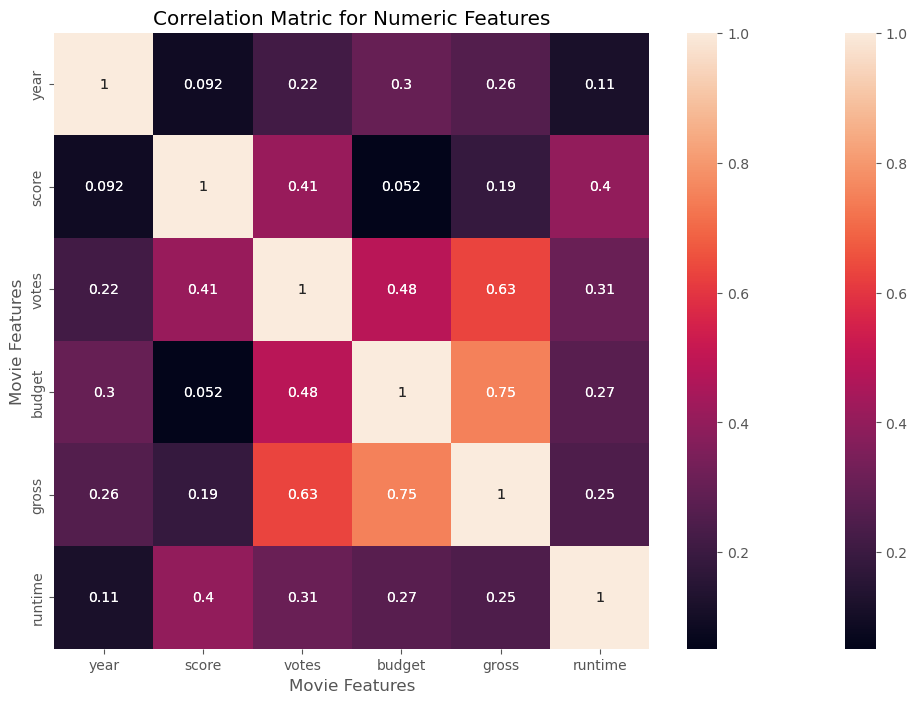

In [250]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [252]:
# Name of Studio - company
# Convert name of company to numbers using cat.codes

In [254]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (U...",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (Un...",5.8,65000.0,Randal Kleiser,Henry De Vere St...,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,1980-07-02,United States
2,Star Wars: Episo...,PG,Action,1980,"June 20, 1980 (U...",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (Un...",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (U...",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020...",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020...",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,NaN,Cactus Blue Ente...,90.0,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (...",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 ...",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020,2020-10-01,United States


In [258]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0,1980-06-13,56
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0,1980-07-02,56
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0,1980-06-20,56
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0,1980-07-02,56
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0,1980-07-25,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,40,2020-10-23,56
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0.0,NaN,539,90.0,40,2020-02-07,56
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,40,2020-04-27,8
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,40,2020-10-01,56


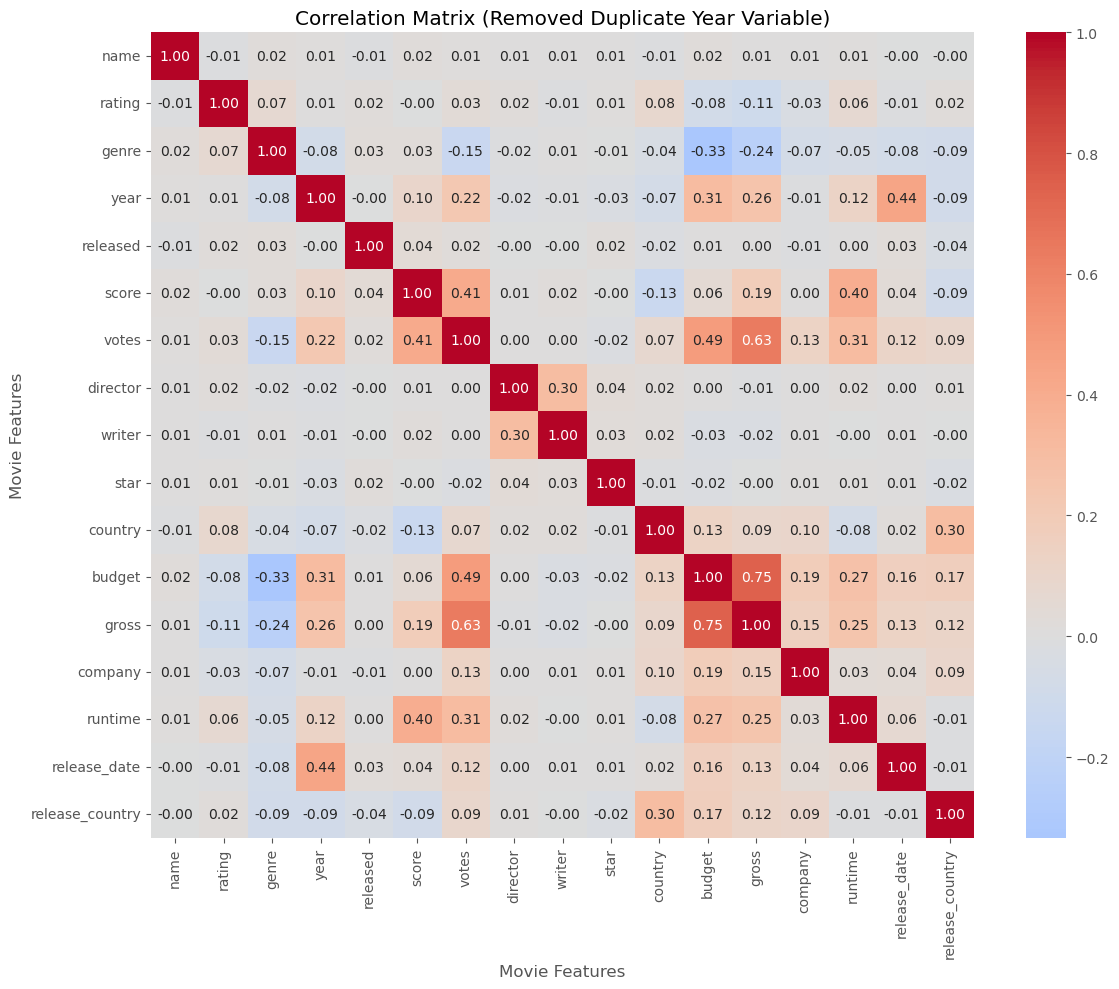

In [272]:
# Remove release_year (keeping the original year column)
df_numerized_clean = df_numerized.drop('release_year', axis=1)
correlation_matrix3 = df_numerized_clean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Removed Duplicate Year Variable)')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.tight_layout()
plt.show()

### Final Touches

In [38]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,2020,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,2020,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,2020,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,2020,2020-10-01,United States


In [59]:
# drop columns not needed

#df = df.drop(['year', 'released'], axis=1)
#df

In [48]:
# need to manually reorder the columns to ensure years arent at the back

df.columns

Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'release_year', 'release_date', 'release_country'],
      dtype='object')

In [52]:
df = df[['name', 'rating', 'genre', 'release_year', 'release_date', 'release_country','score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime']]

In [54]:
df

,name,rating,genre,release_year,release_date,release_country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,6,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,9,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,8,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,United States,3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,2020-02-07,United States,5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,Cameroon,6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,2020-10-01,United States,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120


In [65]:
# add commas to integers for ease of reading


pd.set_option('display.float_format', '{:,.0f}'.format)
df

,name,rating,genre,release_year,release_date,release_country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,"46,998,772",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,"58,853,106",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,"538,375,067",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,"83,453,539",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,"39,846,344",Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,United States,3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,2020-02-07,United States,5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,Cameroon,6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,2020-10-01,United States,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120


In [67]:
# didnt work for budget due to it being a int64


df['budget_cleaned'] = df['budget'].apply(lambda x: f"{x:,}")
print(df[['budget', 'budget_cleaned']])


        budget budget_cleaned
0     19000000     19,000,000
1      4500000      4,500,000
2     18000000     18,000,000
3      3500000      3,500,000
4      6000000      6,000,000
...        ...            ...
7663      7000          7,000
7664         0              0
7665     58750         58,750
7666     15000         15,000
7667         0              0

[7668 rows x 2 columns]


/var/folders/qf/l9g_hqpj6nd644q70jyz72q00000gn/T/ipykernel_1529/3356928472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget_cleaned'] = df['budget'].apply(lambda x: f"{x:,}")


In [69]:
df

,name,rating,genre,release_year,release_date,release_country,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_cleaned
0,The Shining,R,Drama,1980,1980-06-13,United States,8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,"46,998,772",Warner Bros.,146,"19,000,000"
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,"58,853,106",Columbia Pictures,104,"4,500,000"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,"538,375,067",Lucasfilm,124,"18,000,000"
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,"83,453,539",Paramount Pictures,88,"3,500,000"
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,"39,846,344",Orion Pictures,98,"6,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,United States,3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90,"7,000"
7664,Dream Round,NaN,Comedy,2020,2020-02-07,United States,5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90,0
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,Cameroon,6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,"58,750"
7666,It's Just Us,NaN,Drama,2020,2020-10-01,United States,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120,"15,000"


In [71]:
df = df.drop(['budget'], axis=1)

In [73]:
df

,name,rating,genre,release_year,release_date,release_country,score,votes,director,writer,star,country,gross,company,runtime,budget_cleaned
0,The Shining,R,Drama,1980,1980-06-13,United States,8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"46,998,772",Warner Bros.,146,"19,000,000"
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"58,853,106",Columbia Pictures,104,"4,500,000"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"538,375,067",Lucasfilm,124,"18,000,000"
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"83,453,539",Paramount Pictures,88,"3,500,000"
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"39,846,344",Orion Pictures,98,"6,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,United States,3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,NaN,NaN,90,"7,000"
7664,Dream Round,NaN,Comedy,2020,2020-02-07,United States,5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,Cactus Blue Entertainment,90,0
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,Cameroon,6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,NaN,Embi Productions,NaN,"58,750"
7666,It's Just Us,NaN,Drama,2020,2020-10-01,United States,NaN,NaN,James Randall,James Randall,Christina Roz,United States,NaN,NaN,120,"15,000"


In [75]:
df.columns

Index(['name', 'rating', 'genre', 'release_year', 'release_date',
       'release_country', 'score', 'votes', 'director', 'writer', 'star',
       'country', 'gross', 'company', 'runtime', 'budget_cleaned'],
      dtype='object')

In [77]:
df = df[['name', 'rating', 'genre', 'release_year', 'release_date',
       'release_country', 'score', 'votes', 'director', 'writer', 'star',
       'country','budget_cleaned', 'gross', 'company', 'runtime']]

In [81]:
# final output!
df

,name,rating,genre,release_year,release_date,release_country,score,votes,director,writer,star,country,budget_cleaned,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000","46,998,772",Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000","58,853,106",Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000","538,375,067",Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000","83,453,539",Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000","39,846,344",Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,United States,3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000",NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,2020-02-07,United States,5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,Cameroon,6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,2020-10-01,United States,NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000",NaN,NaN,120
